In [1]:
import obspy
from obspy.clients.fdsn.client import Client
import numpy as np
from scipy.interpolate import interp1d

In [2]:
def apollo_linear_interp_gaps(st):
    # use median filter to remove the high spikes
    st = st.copy()
    # remove the masks in the stream
    for trace in st:
        # convert the masked array to normal array
        trace.data = np.ma.filled(trace.data, fill_value=-1)
        
        x_ori = np.arange(0, len(trace.data))
        # not -1 location
        x = np.where(trace.data != -1)[0]
        
        # if all the data is -1, skip
        if len(x) == 0:
            continue

        # not -1 value
        data_not_minus_one = trace.data[x]
        if len(x) >= 2 and len(data_not_minus_one) >= 2:
            f = interp1d(x, data_not_minus_one, fill_value='extrapolate', kind='linear')
        else:
            trace = np.ones_like(trace.data) * (-1.0)
            continue
        
        trace.data = f(x_ori)
    return st

In [3]:
my_Client = Client("IRIS")

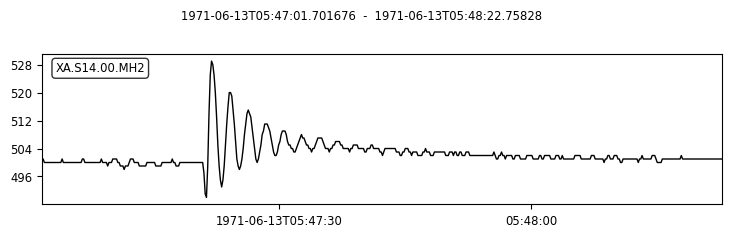

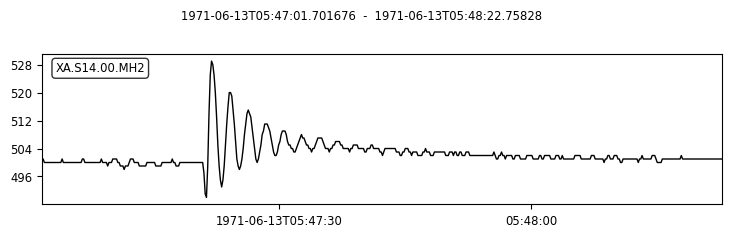

In [4]:
net = 'XA'
# ACC-step example
sta= 'S14'
chn = 'MH2'
starttime = obspy.UTCDateTime('1971-06-13T05:47:01.635909Z')
endtime = obspy.UTCDateTime('1971-06-13T05:48:22.843456Z') 
ACC_step_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
ACC_step_waveform.write('ACC_step_waveform.mseed', format='MSEED')
ACC_step_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


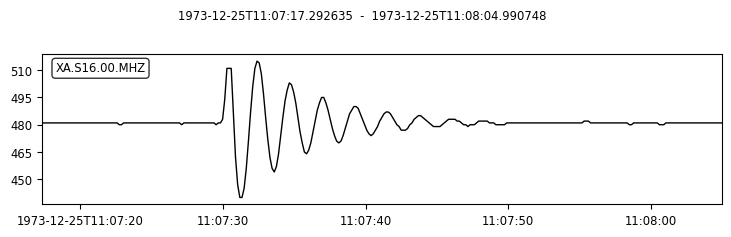

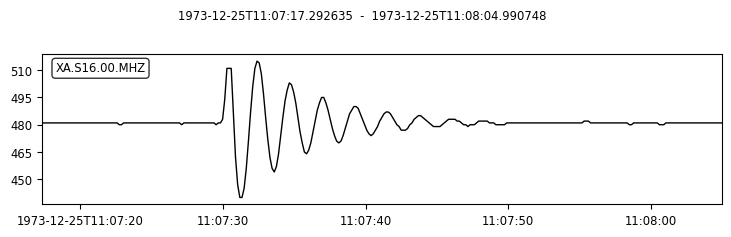

In [5]:
# ACC-spike example
sta= 'S16'
chn = 'MHZ'
starttime = obspy.UTCDateTime('1973-12-25T11:07:17.236235Z')
endtime = obspy.UTCDateTime('1973-12-25T11:08:05.085292Z') 
ACC_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
ACC_spike_waveform = apollo_linear_interp_gaps(ACC_spike_waveform)
ACC_spike_waveform.write('ACC_spike_waveform.mseed', format='MSEED')
ACC_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


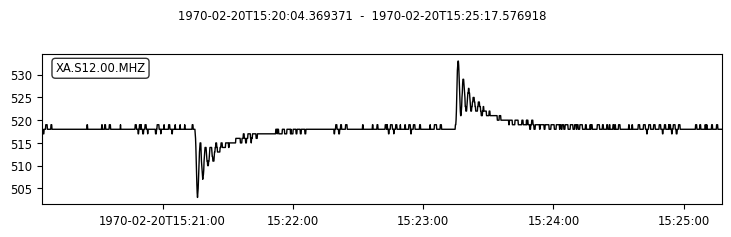

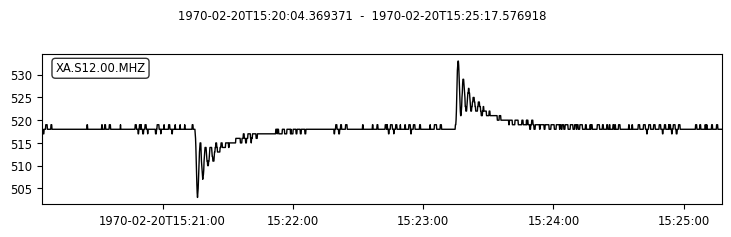

In [6]:
# Cali example
sta= 'S12'
chn = 'MHZ'
starttime = obspy.UTCDateTime('1970-02-20T15:20:04.219621Z')
endtime = obspy.UTCDateTime('1970-02-20T15:25:17.729055Z') 
Cali_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Cali_spike_waveform = apollo_linear_interp_gaps(Cali_spike_waveform)
Cali_spike_waveform.write('Cali_spike_waveform.mseed', format='MSEED')
Cali_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


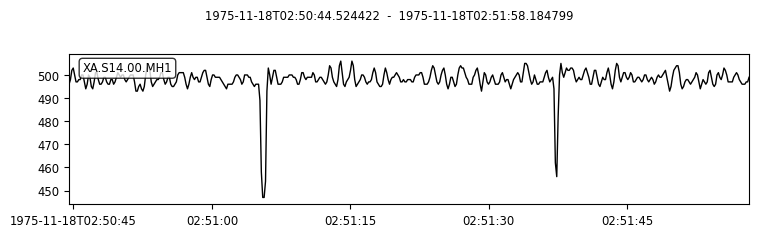

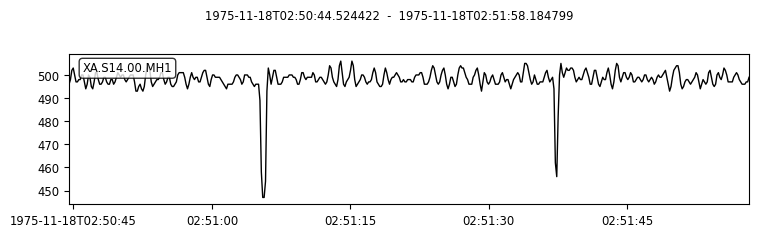

In [7]:
# Isolated distrubance example
sta= 'S14'
chn = 'MH1'
starttime = obspy.UTCDateTime('1975-11-18T02:51:04.439102Z') - 20
endtime = obspy.UTCDateTime('1975-11-18T02:51:38.250423Z') + 20
Complex_01_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_01_spike_waveform = apollo_linear_interp_gaps(Complex_01_spike_waveform)
Complex_01_spike_waveform.write('Isolated_distrubance.mseed', format='MSEED')
Complex_01_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


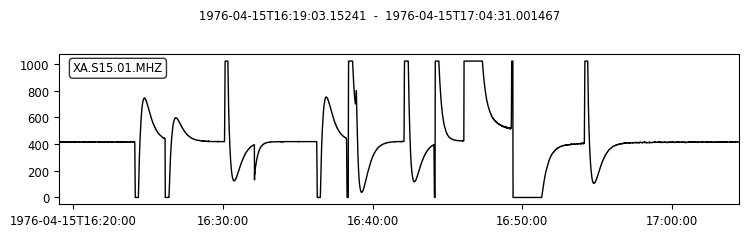

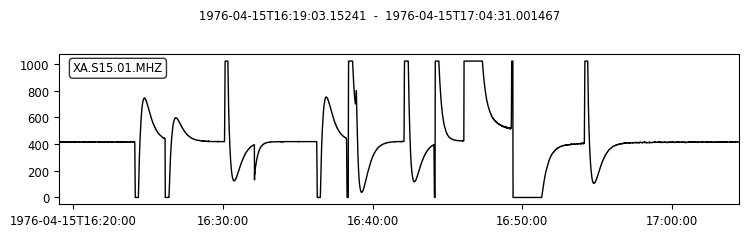

In [8]:
# Complex example 02
sta= 'S15'
chn = 'MHZ'
starttime = obspy.UTCDateTime('1976-04-15T16:19:03.140333Z')
endtime = obspy.UTCDateTime('1976-04-15T17:04:31.140333Z') 
Complex_02_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_02_spike_waveform = apollo_linear_interp_gaps(Complex_02_spike_waveform)
Complex_02_spike_waveform.write('Complex_02_spike_waveform.mseed', format='MSEED')
Complex_02_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


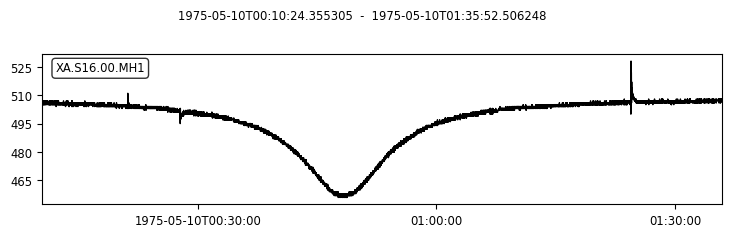

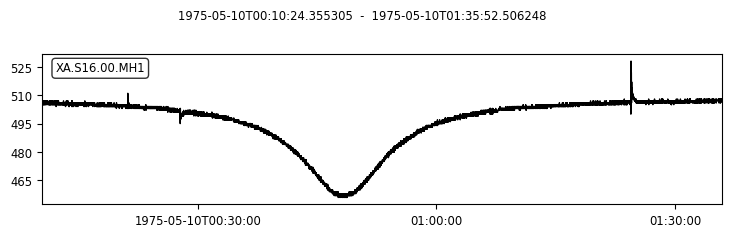

In [9]:
# Complex example 03
sta= 'S16'
chn = 'MH1'
starttime = obspy.UTCDateTime('1975-05-10T00:10:24.206000Z')
endtime = obspy.UTCDateTime('1975-05-10T01:35:52.658830Z') 
Complex_03_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_03_spike_waveform = apollo_linear_interp_gaps(Complex_03_spike_waveform)
Complex_03_spike_waveform.write('Complex_03_spike_waveform.mseed', format='MSEED')
Complex_03_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


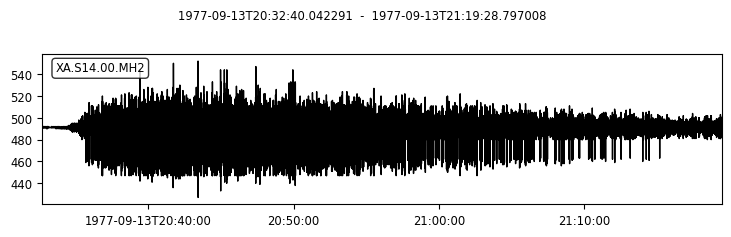

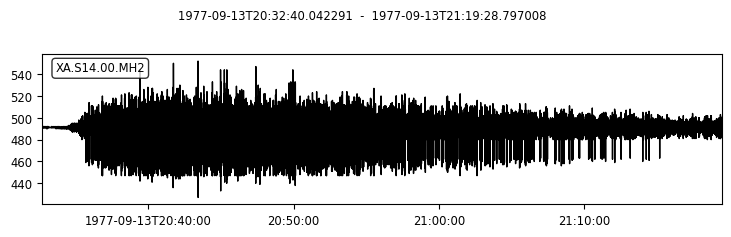

In [10]:
# Extended distrubance example
sta = 'S14'
chn = 'MH2'
starttime = obspy.UTCDateTime('1977-09-13T20:32:59.967585Z') - 20
endtime = obspy.UTCDateTime('1977-09-13T21:19:08.873245Z') + 20
Complex_04_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_04_spike_waveform = apollo_linear_interp_gaps(Complex_04_spike_waveform)
Complex_04_spike_waveform.write('Extended_distrubance.mseed', format='MSEED')
Complex_04_spike_waveform.plot()

c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


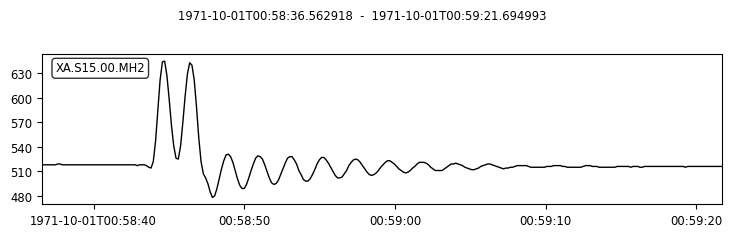

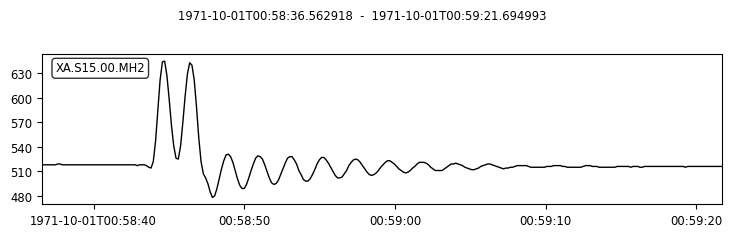

In [11]:
# Complex example 05
sta = 'S15'
chn = 'MH2'
starttime = obspy.UTCDateTime('1971-10-01T00:58:36.442344Z')
endtime = obspy.UTCDateTime('1971-10-01T00:59:21.725363Z')
Complex_05_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_05_spike_waveform = apollo_linear_interp_gaps(Complex_05_spike_waveform)
Complex_05_spike_waveform.write('Complex_05_spike_waveform.mseed', format='MSEED')
Complex_05_spike_waveform.plot()


c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)
c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\imaging\util.py:266: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small')
c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\imaging\waveform.py:805: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  plt.setp(ax.get_xticklabels(), fontsize='small',


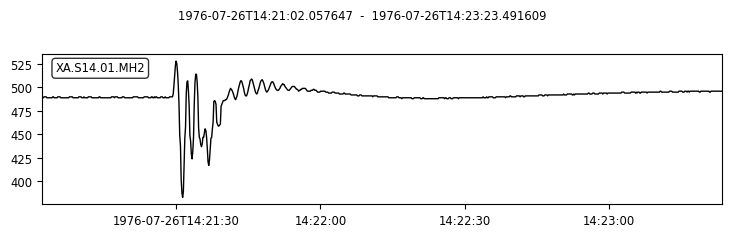

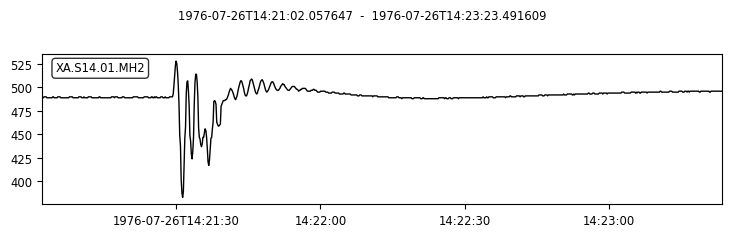

In [12]:
# Complex example 06
sta = 'S14'
chn = 'MH2'
starttime = obspy.UTCDateTime('1976-07-26T14:21:02.000757Z')
endtime = obspy.UTCDateTime('1976-07-26T14:23:23.585663Z')
Complex_06_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_06_spike_waveform = apollo_linear_interp_gaps(Complex_06_spike_waveform)
Complex_06_spike_waveform.write('Complex_06_spike_waveform.mseed', format='MSEED')
Complex_06_spike_waveform.plot()


c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


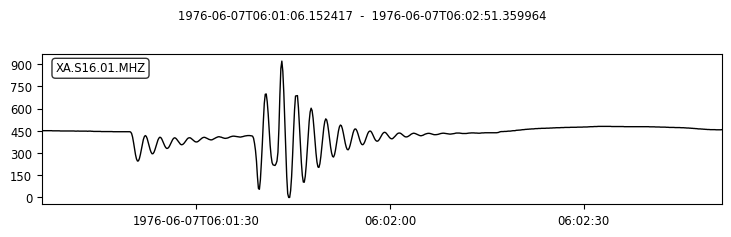

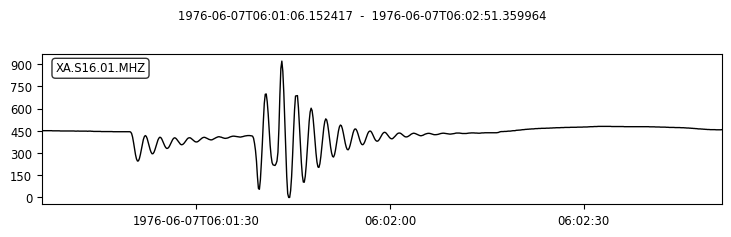

In [13]:
# Complex example 07
sta = 'S16'
chn = 'MHZ'
starttime = obspy.UTCDateTime('1976-06-07T06:01:06.038473Z')
endtime = obspy.UTCDateTime('1976-06-07T06:02:51.396964Z')
Complex_07_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_07_spike_waveform = apollo_linear_interp_gaps(Complex_07_spike_waveform)
Complex_07_spike_waveform.write('Complex_07_spike_waveform.mseed', format='MSEED')
Complex_07_spike_waveform.plot()


c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


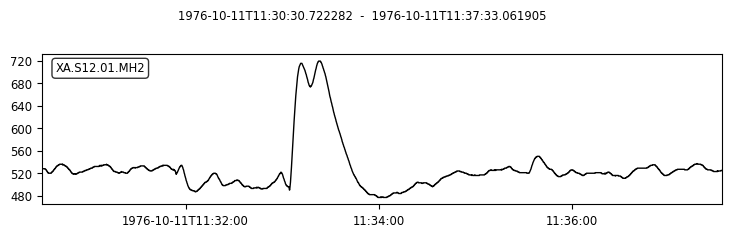

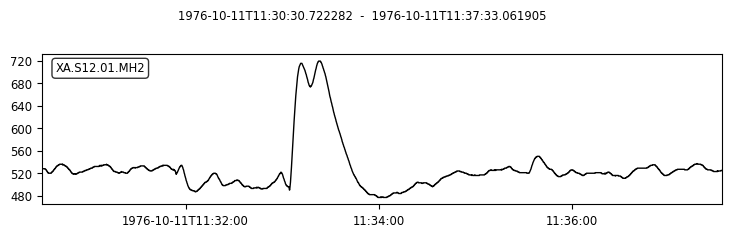

In [14]:
# Complex example 08
sta = 'S12'
chn = 'MH2'
starttime = obspy.UTCDateTime('1976-10-11T11:30:30.572776Z')
endtime = obspy.UTCDateTime('1976-10-11T11:37:33.214285Z')
Complex_08_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_08_spike_waveform = apollo_linear_interp_gaps(Complex_08_spike_waveform)
Complex_08_spike_waveform.write('Complex_07_spike_waveform.mseed', format='MSEED')
Complex_08_spike_waveform.plot()


c:\Users\77918\anaconda3\envs\obspy\lib\site-packages\obspy\io\mseed\core.py:770: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


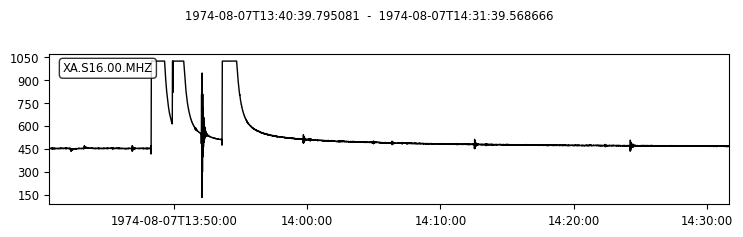

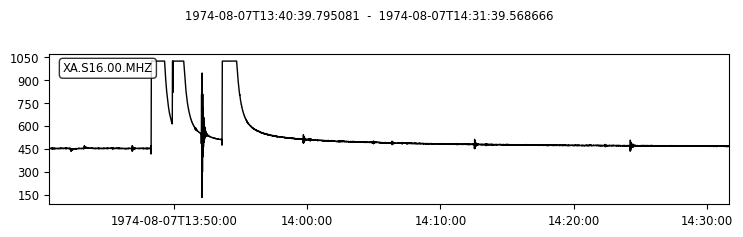

In [15]:
# Complex example 09
sta = 'S16'
chn = 'MHZ'
starttime = obspy.UTCDateTime('1974-08-07T13:40:39.684365Z')
endtime = obspy.UTCDateTime('1974-08-07T14:31:39.608893Z')
Complex_09_spike_waveform = my_Client.get_waveforms(network=net, station=sta, location='*', channel=chn, starttime=starttime, endtime=endtime)
Complex_09_spike_waveform = apollo_linear_interp_gaps(Complex_09_spike_waveform)
Complex_09_spike_waveform.write('Complex_07_spike_waveform.mseed', format='MSEED')
Complex_09_spike_waveform.plot()


In [16]:
import matplotlib.pyplot as plt

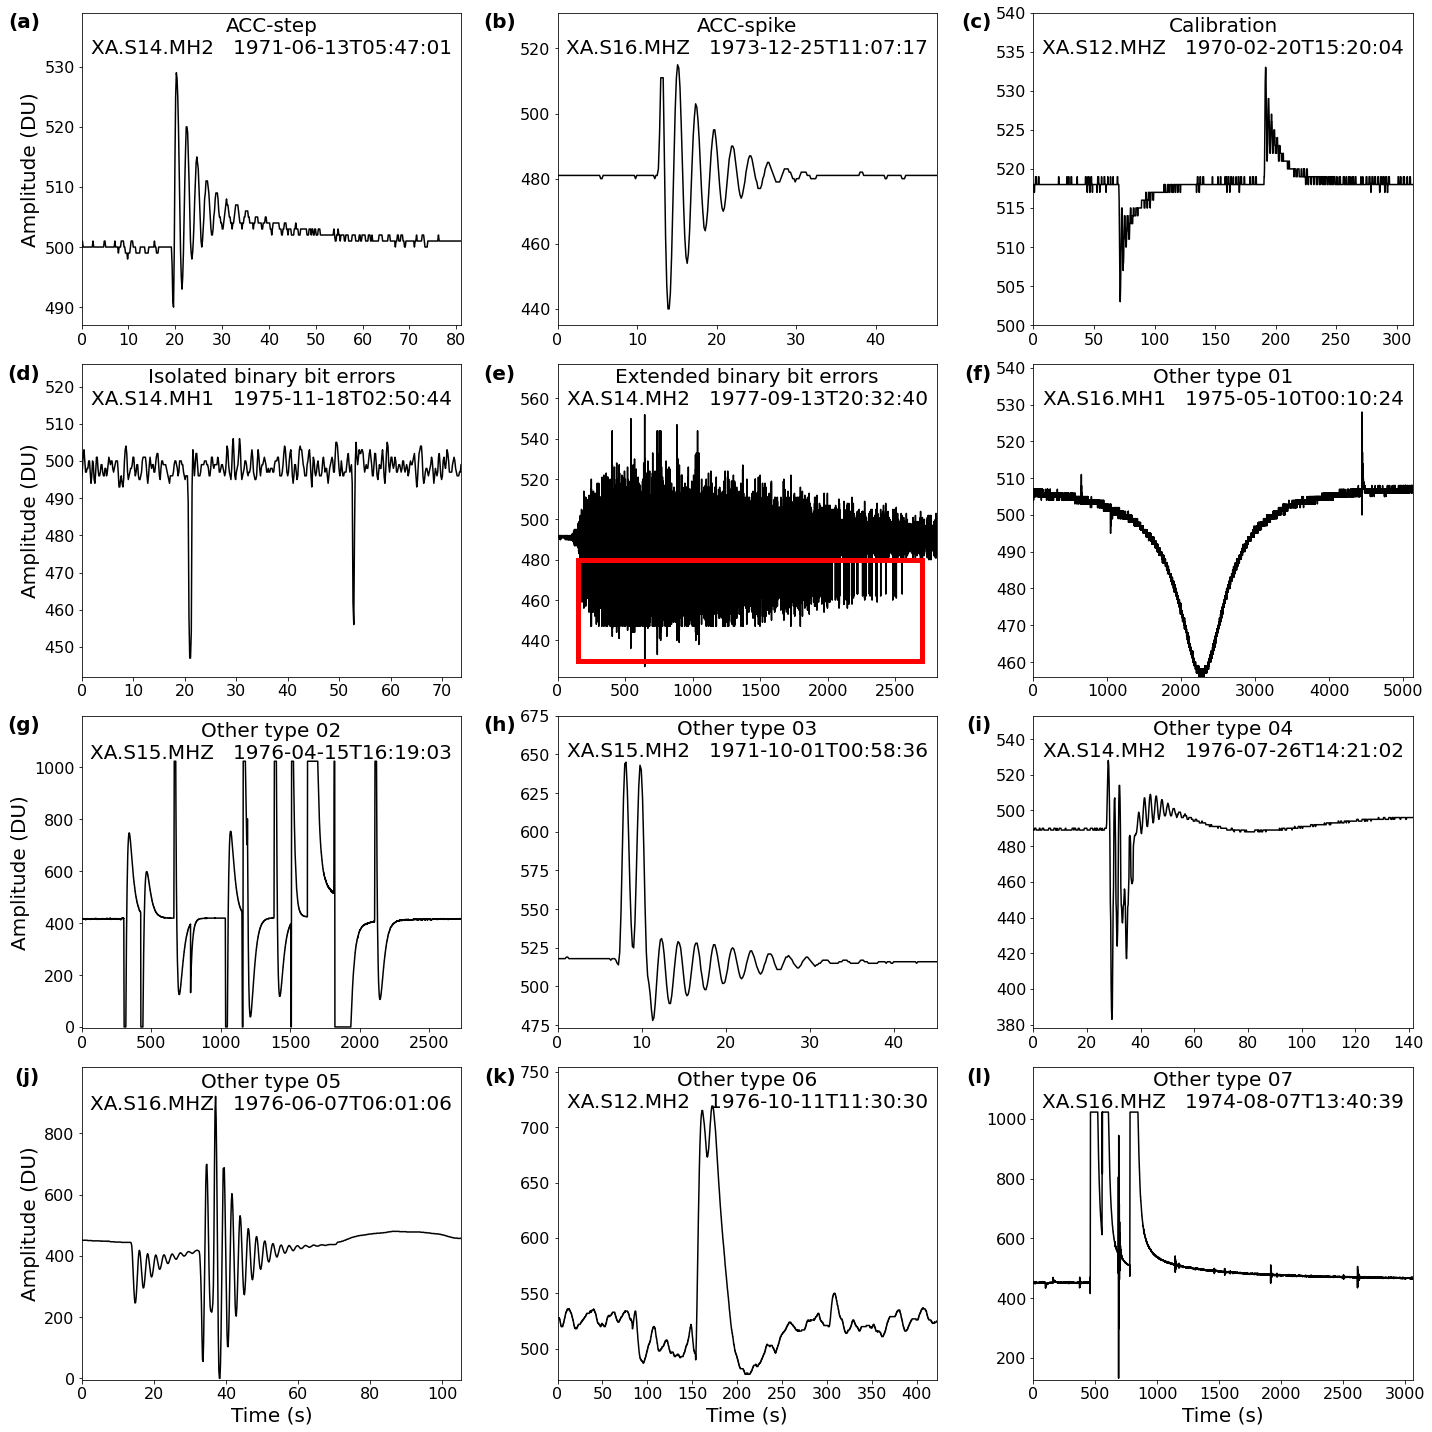

In [25]:
fontsize_1 = 20
fontsize_2 = 16
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
starttime = ACC_step_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = ACC_step_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = ACC_step_waveform[0].stats.network
sta = ACC_step_waveform[0].stats.station
chn = ACC_step_waveform[0].stats.channel
plt.plot(ACC_step_waveform[0].times(), ACC_step_waveform[0].data, color='k')
plt.xlim([0, ACC_step_waveform[0].times()[-1]])
#plt.title('ACC-step {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
t_loc = np.max(ACC_step_waveform[0].times())*0.5
amp_loc = (np.max(ACC_step_waveform[0].data) - np.min(ACC_step_waveform[0].data) + 13)*0.87 + np.min(ACC_step_waveform[0].data) - 3
plt.ylim([np.min(ACC_step_waveform[0].data) - 3, np.max(ACC_step_waveform[0].data)+ 10] )
plt.text(t_loc, amp_loc, 'ACC-step\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
#plt.xlabel('Time (s)', fontsize=fontsize_1)
plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
# (a) in upper left corner
plt.text(-0.11, 1.0, '(a)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,2)
starttime = ACC_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = ACC_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = ACC_spike_waveform[0].stats.network
sta = ACC_spike_waveform[0].stats.station
chn = ACC_spike_waveform[0].stats.channel
plt.plot(ACC_spike_waveform[0].times(), ACC_spike_waveform[0].data, color='k')
plt.xlim([0, ACC_spike_waveform[0].times()[-1]])
#plt.title('ACC-spike {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
t_loc = np.max(ACC_spike_waveform[0].times())*0.5
amp_loc = (np.max(ACC_spike_waveform[0].data) - np.min(ACC_spike_waveform[0].data) + 21)*0.87 + np.min(ACC_spike_waveform[0].data) - 5
plt.ylim([np.min(ACC_spike_waveform[0].data) - 5, np.max(ACC_spike_waveform[0].data)+ 16] )
plt.text(t_loc, amp_loc, 'ACC-spike\n{}.{}.{}   {}'.format(net, sta, chn,starttime), fontsize=fontsize_1, horizontalalignment='center')
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(b)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,3)
starttime = Cali_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Cali_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Cali_spike_waveform[0].stats.network
sta = Cali_spike_waveform[0].stats.station
chn = Cali_spike_waveform[0].stats.channel
plt.plot(Cali_spike_waveform[0].times(), Cali_spike_waveform[0].data, color='k')
plt.xlim([0, Cali_spike_waveform[0].times()[-1]])
t_loc = np.max(Cali_spike_waveform[0].times())*0.5
amp_loc = (np.max(Cali_spike_waveform[0].data) - np.min(Cali_spike_waveform[0].data) + 10)*0.87 + np.min(Cali_spike_waveform[0].data) - 3
plt.ylim([np.min(Cali_spike_waveform[0].data) - 3, np.max(Cali_spike_waveform[0].data)+ 7] )
plt.text(t_loc, amp_loc, 'Calibration\n{}.{}.{}   {}'.format(net, sta, chn,starttime), fontsize=fontsize_1, horizontalalignment='center')
#plt.title('Calibration {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)
plt.text(-0.11, 1.0, '(c)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')

plt.subplot(4,3,4)
starttime = Complex_01_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_01_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_01_spike_waveform[0].stats.network
sta = Complex_01_spike_waveform[0].stats.station
chn = Complex_01_spike_waveform[0].stats.channel
plt.plot(Complex_01_spike_waveform[0].times(), Complex_01_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_01_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_01_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_01_spike_waveform[0].data) - np.min(Complex_01_spike_waveform[0].data ) + 25)*0.87  + np.min(Complex_01_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Isolated binary bit errors\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_01_spike_waveform[0].data) - 5, np.max(Complex_01_spike_waveform[0].data)+ 20] )
plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(d)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,7)
starttime = Complex_02_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_02_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_02_spike_waveform[0].stats.network
sta = Complex_02_spike_waveform[0].stats.station
chn = Complex_02_spike_waveform[0].stats.channel
plt.plot(Complex_02_spike_waveform[0].times(), Complex_02_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_02_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_02_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_02_spike_waveform[0].data) - np.min(Complex_02_spike_waveform[0].data)+170)*0.87 + np.min(Complex_02_spike_waveform[0].data)-5
plt.ylim([np.min(Complex_02_spike_waveform[0].data) -5, np.max(Complex_02_spike_waveform[0].data)+175] )
plt.text(t_loc, amp_loc, 'Other type 02\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
#plt.title('Other type 02 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(g)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,6)
starttime = Complex_03_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_03_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_03_spike_waveform[0].stats.network
sta = Complex_03_spike_waveform[0].stats.station
chn = Complex_03_spike_waveform[0].stats.channel
plt.plot(Complex_03_spike_waveform[0].times(), Complex_03_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_03_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_03_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_03_spike_waveform[0].data) - np.min(Complex_03_spike_waveform[0].data) + 13)*0.87 + np.min(Complex_03_spike_waveform[0].data)
plt.text(t_loc, amp_loc, 'Other type 01\n{}.{}.{}   {}'.format(net, sta, chn,starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_03_spike_waveform[0].data), np.max(Complex_03_spike_waveform[0].data) + 13] )
#plt.title('Other type 01 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(f)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,5)
starttime = Complex_04_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_04_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_04_spike_waveform[0].stats.network
sta = Complex_04_spike_waveform[0].stats.station
chn = Complex_04_spike_waveform[0].stats.channel
plt.plot(Complex_04_spike_waveform[0].times(), Complex_04_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_04_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_04_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_04_spike_waveform[0].data) - np.min(Complex_04_spike_waveform[0].data)+ 30)*0.87 + np.min(Complex_04_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Extended binary bit errors\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_04_spike_waveform[0].data) - 5, np.max(Complex_04_spike_waveform[0].data)+ 25] )
#plt.title('Extended binary bit errors {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.plot([150,2700],[430,430], color='r', linewidth=5)
plt.plot([150,2700],[480,480], color='r', linewidth=5)
plt.plot([150,150], [430,480], color='r', linewidth=5)
plt.plot([2700,2700],[430,480], color='r', linewidth=5)

plt.text(-0.11, 1.0, '(e)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,8)
starttime = Complex_05_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_05_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_05_spike_waveform[0].stats.network
sta = Complex_05_spike_waveform[0].stats.station
chn = Complex_05_spike_waveform[0].stats.channel
plt.plot(Complex_05_spike_waveform[0].times(), Complex_05_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_05_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_05_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_05_spike_waveform[0].data) - np.min(Complex_05_spike_waveform[0].data)+ 35)*0.87 + np.min(Complex_05_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Other type 03\n{}.{}.{}   {}'.format(net, sta, chn,starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_05_spike_waveform[0].data) - 5, np.max(Complex_05_spike_waveform[0].data)+ 30] )
#plt.title('Other type 03 {}.{}.{}'.format(net, sta, chn), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(h)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,9)
starttime = Complex_06_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_06_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_06_spike_waveform[0].stats.network
sta = Complex_06_spike_waveform[0].stats.station
chn = Complex_06_spike_waveform[0].stats.channel
plt.plot(Complex_06_spike_waveform[0].times(), Complex_06_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_06_spike_waveform[0].times()[-1]])
t_loc = np.max(Complex_06_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_06_spike_waveform[0].data) - np.min(Complex_06_spike_waveform[0].data)+ 30)*0.87 + np.min(Complex_06_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Other type 04\n{}.{}.{}   {}'.format(net, sta, chn,starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_06_spike_waveform[0].data) - 5, np.max(Complex_06_spike_waveform[0].data)+ 25] )

#plt.title('Other type 04 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
#plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(i)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,10)
starttime = Complex_07_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_07_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_07_spike_waveform[0].stats.network
sta = Complex_07_spike_waveform[0].stats.station
chn = Complex_07_spike_waveform[0].stats.channel
plt.plot(Complex_07_spike_waveform[0].times(), Complex_07_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_07_spike_waveform[0].times()[-1]])
#plt.title('Other type 05 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
t_loc = np.max(Complex_07_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_07_spike_waveform[0].data) - np.min(Complex_07_spike_waveform[0].data)+ 95)*0.87 + np.min(Complex_07_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Other type 05\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_07_spike_waveform[0].data) - 5, np.max(Complex_07_spike_waveform[0].data)+ 95] )

plt.yticks(np.arange(0, 801, 200))
plt.xlabel('Time (s)', fontsize=fontsize_1)
plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(j)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,11)
starttime = Complex_08_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_08_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_08_spike_waveform[0].stats.network
sta = Complex_08_spike_waveform[0].stats.station
chn = Complex_08_spike_waveform[0].stats.channel
plt.plot(Complex_08_spike_waveform[0].times(), Complex_08_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_08_spike_waveform[0].times()[-1]])
#plt.title('Other type 06 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
t_loc = np.max(Complex_08_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_08_spike_waveform[0].data) - np.min(Complex_08_spike_waveform[0].data)+ 40)*0.87 + np.min(Complex_08_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Other type 06\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_08_spike_waveform[0].data) - 5, np.max(Complex_08_spike_waveform[0].data)+ 35] )

plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(k)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.subplot(4,3,12)
starttime = Complex_09_spike_waveform[0].stats.starttime.strftime('%Y-%m-%dT%H:%M:%S')
endtime = Complex_09_spike_waveform[0].stats.endtime.strftime('%Y-%m-%dT%H:%M:%S')
net = Complex_09_spike_waveform[0].stats.network
sta = Complex_09_spike_waveform[0].stats.station
chn = Complex_09_spike_waveform[0].stats.channel
plt.plot(Complex_09_spike_waveform[0].times(), Complex_09_spike_waveform[0].data, color='k')
plt.xlim([0, Complex_09_spike_waveform[0].times()[-1]])
#plt.title('Other type 07 {}.{}.{}\n{} - {}'.format(net, sta, chn, starttime, endtime), fontsize=fontsize_1)
t_loc = np.max(Complex_09_spike_waveform[0].times())*0.5
amp_loc = (np.max(Complex_09_spike_waveform[0].data) - np.min(Complex_09_spike_waveform[0].data)+ 155)*0.87 + np.min(Complex_09_spike_waveform[0].data) - 5
plt.text(t_loc, amp_loc, 'Other type 07\n{}.{}.{}   {}'.format(net, sta, chn, starttime), fontsize=fontsize_1, horizontalalignment='center')
plt.ylim([np.min(Complex_09_spike_waveform[0].data) - 5, np.max(Complex_09_spike_waveform[0].data)+ 150] )
plt.xlabel('Time (s)', fontsize=fontsize_1)
#plt.ylabel('Amplitude (DU)', fontsize=fontsize_1)
plt.text(-0.11, 1.0, '(l)', transform=plt.gca().transAxes, fontsize=fontsize_1, fontweight='bold', va='top', ha='right')
plt.xticks(fontsize=fontsize_2)
plt.yticks(fontsize=fontsize_2)

plt.tight_layout()
plt.savefig('Figure1.png',dpi=600)
plt.show()
plt.close()